# 비트코인 시세 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 소스
# https://www.blockchain.com/ko/charts

In [8]:
file_path='../data/market-price.csv'
bitcoin_df = pd.read_csv(file_path,names=['day','price'])

print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()


(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


# 시각화

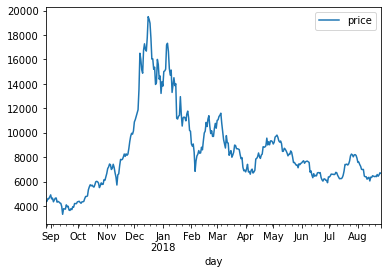

In [9]:
# to_datetime day 피처를 시계열 피처로 변환
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 데이터 프레임의 index 로 설정
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day',inplace=True)

# 일자별 비트코인 시세를 시각화
bitcoin_df.plot()
plt.show()

# ARIMA 분석

In [13]:
# 시계열 분석 방법줌 ARIMA 분석방법
# 파이썬에서는 statsmodel 모듀로 분석 수행가능
import warnings


from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR =2 , 차분 = 1 ,MA=2)파라미터로 ARIMA 모델을 학습
model = ARIMA(bitcoin_df.price.values,order=(2,1,2))
model_fit = model.fit(trend='C',full_output = True , disp = True)
print(model_fit.summary())

C:\Users\R3600\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Tue, 26 Oct 2021   AIC                           5587.107
Time:                        17:47:04   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3629     27.794      0.229      0.819     -48.113      60.839
ar.L1.D.y     -0.3790      1.829     -0.207      0.836      -3.964       3.206
ar.L2.D.y      0.1585      1.192      0.133      0.8

C:\Users\R3600\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


### ARIMA 모델 활용하기 : 모델의 성능 & 예측 결과 시각화

<AxesSubplot:>

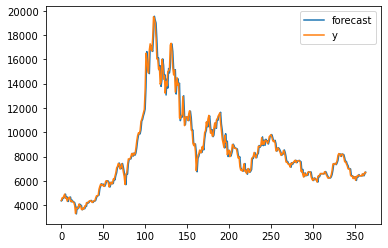

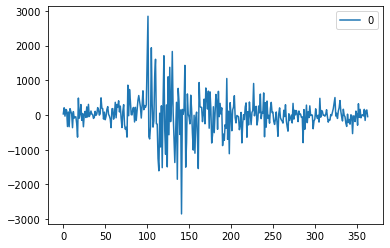

In [14]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과

residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화

residuals.plot()

# ARIMA 모델 활용하기
실제 데이터와의 비교

In [ ]:
forecast_data = model_fit.forecast(steps =5) # 학습 데이터셋으로 부터 5일뒤를 예측

# 텍스트 데이터 셋을 불러옴
test_file_path =  '../data/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path,names=['ds','y'])

pred_y = forecast_data[0].tolist()
test_y = bitcoin_test_df.y.values

pred_y_lower = []
pred_y_upper = []
for lower_upper in forecast_data[2]:
    lower =lower_upper[0]
    upper =lower_upper[0]
    pred_y_lower.append(lower)
    pred_y_lower.append(upper)
    
    
